In [2]:
import random
import numpy as np
from tqdm import tqdm
from pandas import DataFrame
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deeps\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Preprocessing.

In [3]:
text_data=''
fd=open('big.txt','r')
text_data=fd.read()
fd.close()


In [4]:
len(text_data)

6488666

It is a very huge dataset that contains alomost 6.4 million chracters in it ,we will shorten it to train it faster.

In [7]:
text_data=text_data[:100000]

for i in '!@#$~%^&*()_+-=[]{}\|;:",/<>?"\n':
    text_data = text_data.replace(i,' ')
text_data = text_data.replace("'","")

In [9]:
len(text_data)

99714

In [12]:
text_data = text_data.replace('  ',' ')
text_data = text_data.replace('  ',' ')

In [13]:
text_data

'The Project Gutenberg EBook of The Adventures of Sherlock Holmes by Sir Arthur Conan Doyle 15 in our series by Sir Arthur Conan Doyle Copyright laws are changing all over the world. Be sure to check the copyright laws for your country before downloading or redistributing this or any other Project Gutenberg eBook. This header should be the first thing seen when viewing this Project Gutenberg file. Please do not remove it. Do not change or edit the header without written permission. Please read the legal small print and other information about the eBook and Project Gutenberg at the bottom of this file. Included is important information about your specific rights and restrictions in how the file may be used. You can also find out about how to make a donation to Project Gutenberg and how to get involved. Welcome To The World of Free Plain Vanilla Electronic Texts eBooks Readable By Both Humans and By Computers Since 1971  These eBooks Were Prepared By Thousands of Volunteers  Title The Ad

In [14]:
words = word_tokenize(text_data)

words = [word for word in words if len(word) != 0]              # Removing Null
word_index = {word: i for i, word in enumerate(set(words))}     # Creating Word Index Dictionary
index_word = {word_index[word]:word for word in word_index}     # Creating Index Word Dictionary


In [15]:
sents = [word_tokenize(sent) for sent in sent_tokenize(text_data)]

In [33]:
len(word_index)

3445

In [19]:
len(words)

19642

In [21]:
window_size=2

features=[]
labels=[]

for sent in sents:
    for i in range(len(sent)-((window_size)*2)):
        features.append(sent[i:i+window_size] +sent[i+window_size+1 : i+(window_size*2)+1])
        labels.append(sent[i+window_size])

In [23]:
X_Train=[]

for feature in features:
    enc=np.zeros(len(word_index))
    for word in feature:
        enc[word_index[word]]=1
    X_Train.append(enc)

y_train = []

for label in labels:
    enc = np.zeros(len(word_index))
    enc[word_index[label]] = 1
    y_train.append(enc)

X_Train=np.array(X_Train)
y_train=np.array(y_train)


## Building the model layers.

In [26]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense


In [29]:
model=Sequential()
model.add(Dense(100,input_dim=len(word_index),activation='relu'))
model.add(Dense(len(word_index), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_Train, y_train, epochs=10, batch_size=32, verbose=1 )

predictions = model.predict(X_Train)


Epoch 1/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0471 - loss: 7.2047
Epoch 2/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0640 - loss: 6.0438
Epoch 3/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0970 - loss: 5.7635
Epoch 4/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1160 - loss: 5.5210
Epoch 5/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1445 - loss: 5.2311
Epoch 6/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.1809 - loss: 4.9157
Epoch 7/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.2325 - loss: 4.5373
Epoch 8/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.2747 - loss: 4.1887
Epoch 9/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.3167 - loss: 3.7600
Epoch 10/10
478/478 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3707 - loss: 3.3099
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


If len(word_index) = 5000, the structure of word_embeddings is:<br>

word_embeddings[0]: Matrix (5000, 100).<br>
word_embeddings[1]: Vector (100,).<br>
word_embeddings[2]: Matrix (100, 5000).<br>
word_embeddings[3]: Vector (5000,).<br>

<I>word_embeddings = model.get_weights()  </I> <br>
retrieves the weights (trainable parameters) of the entire neural network model. Specifically, it will return the weights and biases of all the layers in the model.
1. For Each Dense Layer:
The weights of the layer (a matrix) connecting inputs to neurons.
The biases of the layer (a vector) for each neuron.

2. In the Context of Word Embeddings:<br>
i) The weights matrix of this layer is of shape (len(word_index), 100).<br>
ii) Each row in this matrix represents the embedding vector for a unique word in the vocabulary.<br>
iii) These vectors encode semantic or syntactic properties of the words learned during training.<br>

3. Structure of word_embeddings:<br>
word_embeddings is a list containing the weights and biases for all layers in sequential order.<br>
i) For the first Dense layer:<br>
word_embeddings[0]: Weights matrix of shape (len(word_index), 100).<br>
word_embeddings[1]: Bias vector of shape (100,).<br>
ii) For the second Dense layer:<br>
word_embeddings[2]: Weights matrix of shape (100, len(word_index)).<br>
word_embeddings[3]: Bias vector of shape (len(word_index),).

In [30]:
 # Shape: (len(word_index), 100)
# this will help in matching the vector to the word index
word_embeddings = model.get_weights()[0]


## Visualization.

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Sample words for visualization
sample_words = word_index.keys()
len(sample_words)

3445

In [34]:
# Get embeddings for sample words
sample_embeddings = []
for word in sample_words:
    word_index_ = word_index[word]
    embedding = word_embeddings[word_index_]
    sample_embeddings.append(embedding)

In [38]:
import numpy as np 
onee=np.array(sample_embeddings)
onee.shape

(3445, 100)

In [39]:
# reducing the dimensions 
pca=PCA( n_components=2)
red_embeddings=pca.fit_transform(sample_embeddings)

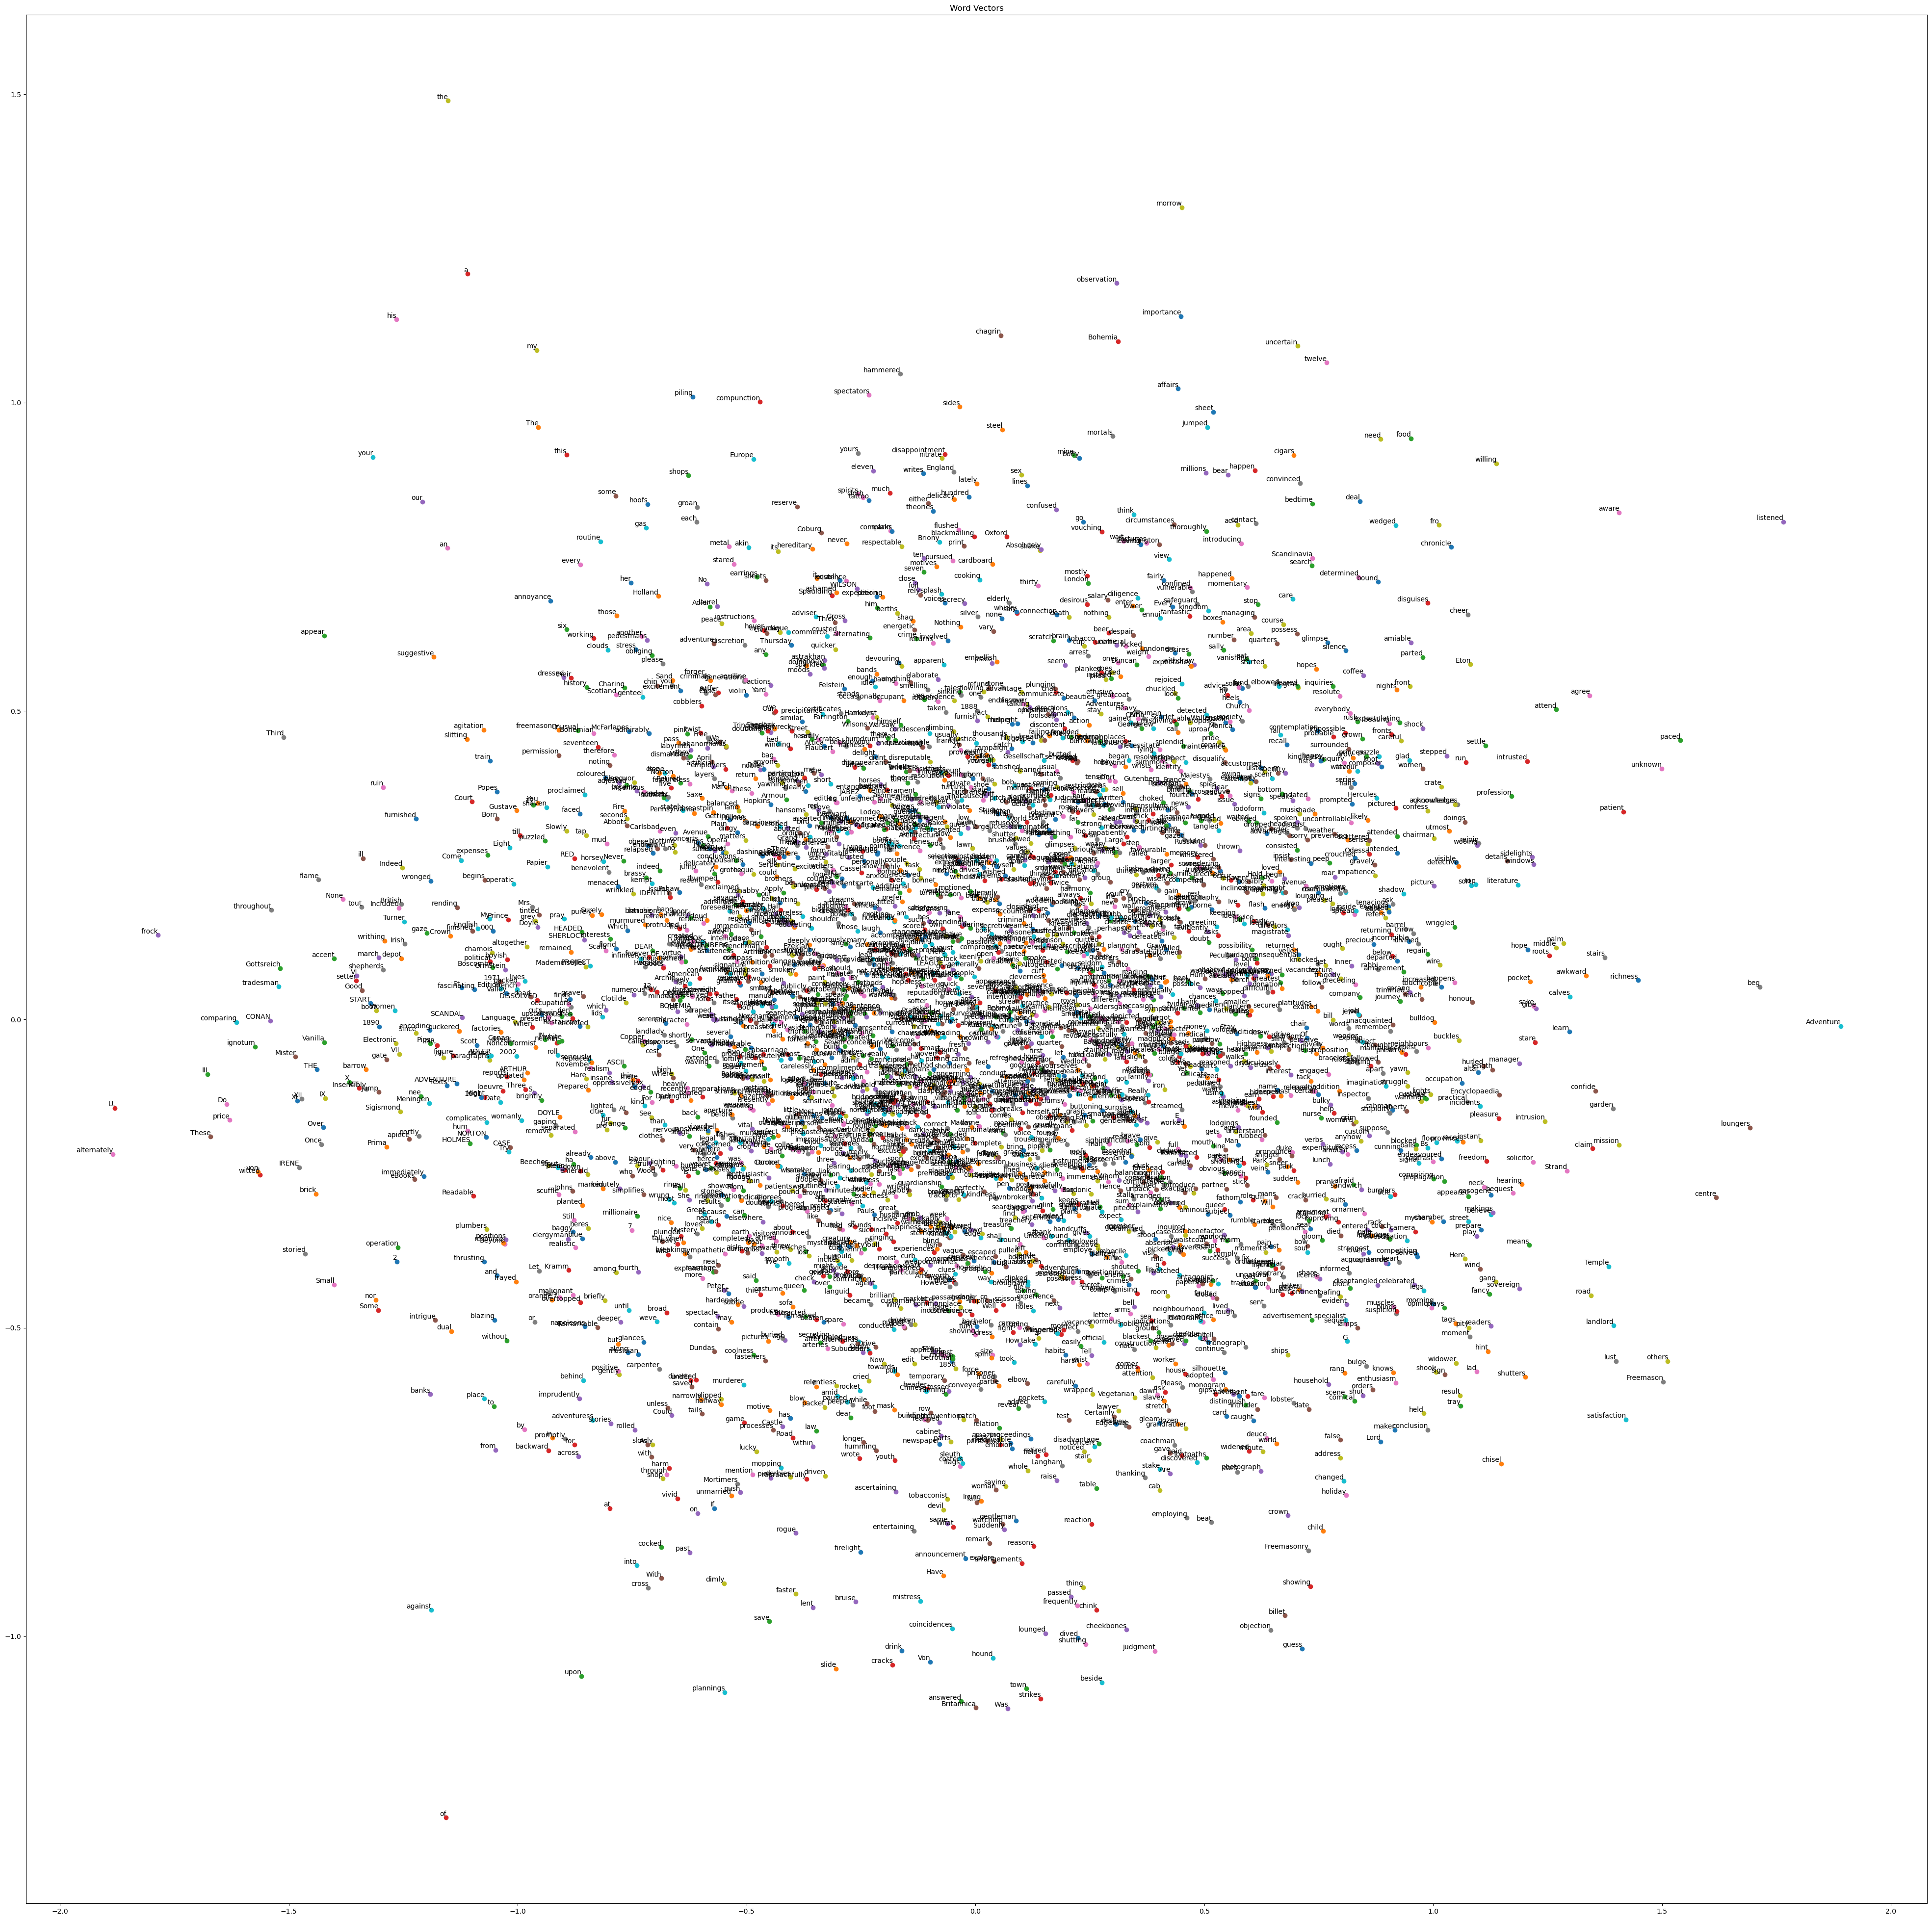

In [41]:
# Plot the word vectors
plt.figure(figsize=(50, 50))
for i, word in enumerate(sample_words):
    x, y = red_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(.5, .5), textcoords='offset points', ha='right', va='bottom')
plt.title('Word Vectors')
plt.show()
     

In [42]:
plt.savefig('word_vectors.jpg', format='jpg', dpi=300)  # dpi=300 for high-quality images
plt.close()

In [45]:
target_word = word_embeddings[word_index['is']]
distances = np.dot(word_embeddings, target_word)
most_similar_indices = np.argsort(distances)[::-1][:25]
most_similar_words = [index_word[i] for i in most_similar_indices]
print("Most similar words to target word:", most_similar_words)

Most similar words to target word: ['is', 'was', 'has', 'finds', 'are', 'Its', 'gives', 'performer', 'interfere', 'were', 'twenty', 'amiss', 'Tell', 'clergyman', 'nicely', 'save', 'entertaining', 'live', 'town', 'did', 'gets', 'gave', 'Is', 'of', 'crib']
